In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid",context="notebook")
plt.rcParams['figure.figsize'] = (10,5)

df = pd.read_csv("freelancer_earnings.csv")
df


,freelancer_id,category,primary_skills,years_experience,experience_level,region,country,education,hourly_rate_usd,annual_income_usd,primary_platform
0,FL0001,AI/ML Engineering,"Computer Vision, TensorFlow, Data Science",1.6,junior,Middle East,Israel,Master,66.41,"$58,873.61",Direct Client
1,FL0002,Backend Development,"PHP, Ruby, Go",8.3,senior,Middle East,UAE,Bootcamp,112.79,"$108,183.05",Freelancer
2,FL0003,UI/UX Design,"Sketch, Wireframing, Adobe XD",3.6,mid,North America,US,Self-taught,94.21,"$88,681.22",Freelancer
3,FL0004,DevOps,"Kubernetes, Terraform, AWS",2.3,mid,North America,US,Self-taught,118.87,"$109,229.42",Upwork
4,FL0005,DevOps,"Azure, Docker, Kubernetes",8.8,senior,Latin America,Mexico,Self-taught,82.76,"$66,298.22",LinkedIn
...,...,...,...,...,...,...,...,...,...,...,...
495,FL0496,UI/UX Design,"Adobe XD, Sketch, Figma",9.7,senior,Western Europe,Germany,Self-taught,129.08,"$114,149.16",Direct Client
496,FL0497,Cybersecurity,"Network Security, Security Audit, Cryptography",1.2,junior,Western Europe,Switzerland,Bootcamp,84.37,"$86,158.21",Toptal
497,FL0498,DevOps,"Docker, Kubernetes, Terraform",6.4,senior,North America,US,Bachelor,220.15,"$225,178.75",LinkedIn
498,FL0499,AI/ML Engineering,"Python, NLP, PyTorch",7.4,senior,Western Europe,UK,PhD,220.01,"$236,868.46",Freelancer


In [6]:
df.head()
df.tail()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   freelancer_id      500 non-null    object 
 1   category           500 non-null    object 
 2   primary_skills     500 non-null    object 
 3   years_experience   500 non-null    float64
 4   experience_level   500 non-null    object 
 5   region             500 non-null    object 
 6   country            500 non-null    object 
 7   education          500 non-null    object 
 8   hourly_rate_usd    500 non-null    float64
 9   annual_income_usd  500 non-null    object 
 10  primary_platform   500 non-null    object 
dtypes: float64(2), object(9)
memory usage: 43.1+ KB


In [7]:
df.describe()

,years_experience,hourly_rate_usd
count,500.000000,500.000000
mean,5.850000,97.149820
std,2.934779,52.697831
min,0.500000,17.280000
25%,3.600000,55.182500
50%,5.600000,84.445000
75%,7.800000,130.497500
max,14.000000,281.470000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
years_experience,500.0,5.85000,2.934779,0.50,3.6000,5.600,7.8000,14.00
hourly_rate_usd,500.0,97.14982,52.697831,17.28,55.1825,84.445,130.4975,281.47


In [13]:
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['column', 'Missing_Values']
missing_df['Missing_Percent'] = (missing_df['Missing_Values'] / len(df)) * 100
missing_df.sort_values('Missing_Percent', ascending=False)

,column,Missing_Values,Missing_Percent
0,freelancer_id,0,0.0
1,category,0,0.0
2,primary_skills,0,0.0
3,years_experience,0,0.0
4,experience_level,0,0.0
5,region,0,0.0
6,country,0,0.0
7,education,0,0.0
8,hourly_rate_usd,0,0.0
9,annual_income_usd,0,0.0


In [11]:
df.duplicated().sum()

np.int64(0)

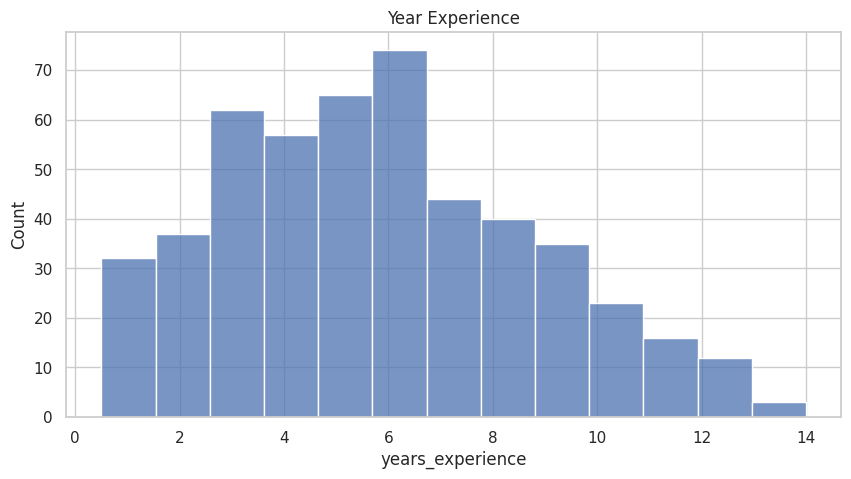

In [26]:
df['years_experience'].value_counts(normalize=True) * 100
sns.histplot(x='years_experience',data=df)
plt.title("Year Experience")
plt.show()

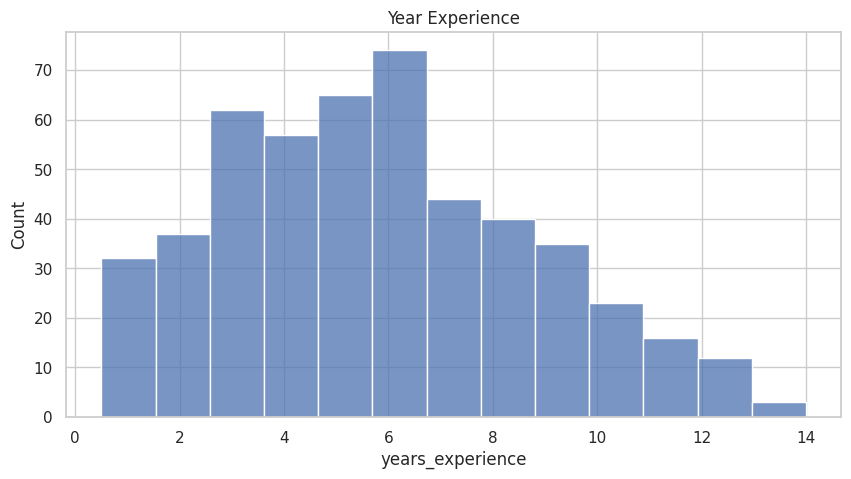

In [28]:
df['years_experience'].value_counts(normalize=True) * 100
sns.histplot(x='years_experience',data=df)
plt.title("Year Experience")
plt.show()

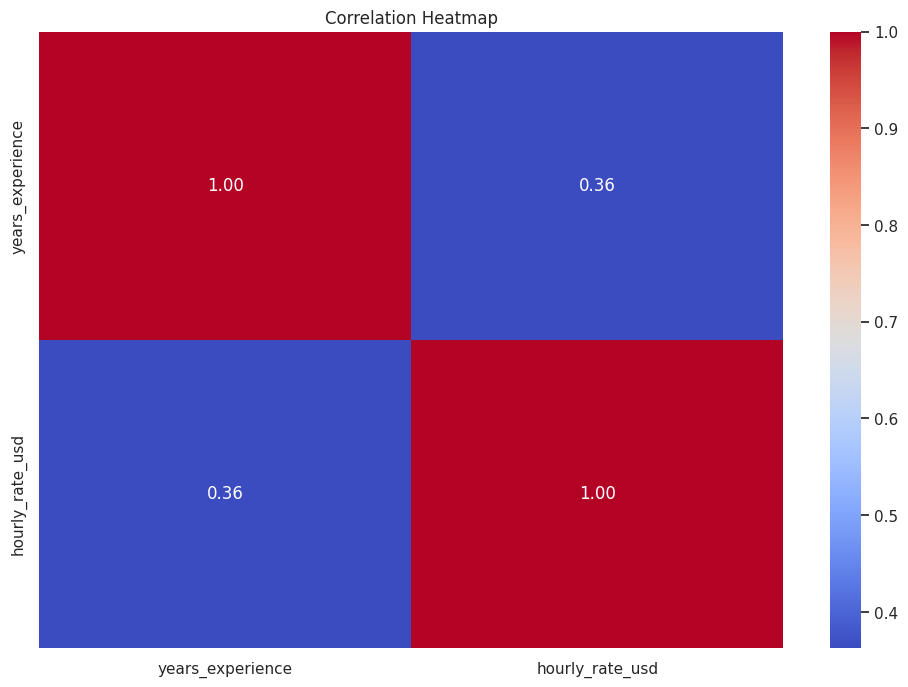

In [27]:

numeric_df = df.select_dtypes(include=['int64','float64'])

corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()